In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data
data = pd.read_csv('./PS_20174392719_1491204439457_log.csv')

### Data Preprocessing

In [4]:
# Checking data 
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
# Checking data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# Data description
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
# Function for checking null and duplicate data
def checkNullAndDuplicateData(dataset):
    null_features = dataset.isnull().sum() # Checking for missing value
    duplicate_data = dataset.duplicated().sum() # Checking duplicate data
    return null_features, duplicate_data

In [8]:
# Checking for missing and duplicate value
missing_data, duplicate_data = checkNullAndDuplicateData(data)
print("Missing values in each features:\n", missing_data)
print("\nDupilcate data:", duplicate_data)

Missing values in each features:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Dupilcate data: 0


In [9]:
# Checking the count occurrences of zero values in each column
for column in data.columns:
    zero_count = (data[column] == 0).sum() #counting number of zeros
    print(f"Zeros in column '{column}' : '{zero_count}'")

Zeros in column 'step' : '0'
Zeros in column 'type' : '0'
Zeros in column 'amount' : '16'
Zeros in column 'nameOrig' : '0'
Zeros in column 'oldbalanceOrg' : '2102449'
Zeros in column 'newbalanceOrig' : '3609566'
Zeros in column 'nameDest' : '0'
Zeros in column 'oldbalanceDest' : '2704388'
Zeros in column 'newbalanceDest' : '2439433'
Zeros in column 'isFraud' : '6354407'
Zeros in column 'isFlaggedFraud' : '6362604'


In [10]:
# Removing invalid entries
data = data[data['amount'] > 0].copy() #removing transaction with zero transaction
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [11]:
# Extracting and printing the feature of categorical data
type_values = data['type'].unique()
print("Features in 'type' column:", type_values)
print("No. of features in 'type' columns: ",len(type_values))

isFraud_values = data['isFraud'].unique()
print("\nFeatures in 'isFraud' column:", isFraud_values)
print("No. of features in 'isFraud' columns: ",len(isFraud_values))

isFlaggedFraud_values = data['isFlaggedFraud'].unique()
print("\nFeatures in 'isFlaggedFraud' column:", isFlaggedFraud_values)
print("No. of features in 'isFlaggedFraud' columns: ",len(isFlaggedFraud_values))

Features in 'type' column: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
No. of features in 'type' columns:  5

Features in 'isFraud' column: [0 1]
No. of features in 'isFraud' columns:  2

Features in 'isFlaggedFraud' column: [0 1]
No. of features in 'isFlaggedFraud' columns:  2


In [12]:
# Copying 'type' in a new feature
data['type_catagory'] = data['type']

# Label encoding 'type' feature
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

# Displaying the mapping
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

{'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}


## Exploratory Data Analysis (EDA) 

Text(0.5, 1, 'Histograms of Numerical Features')

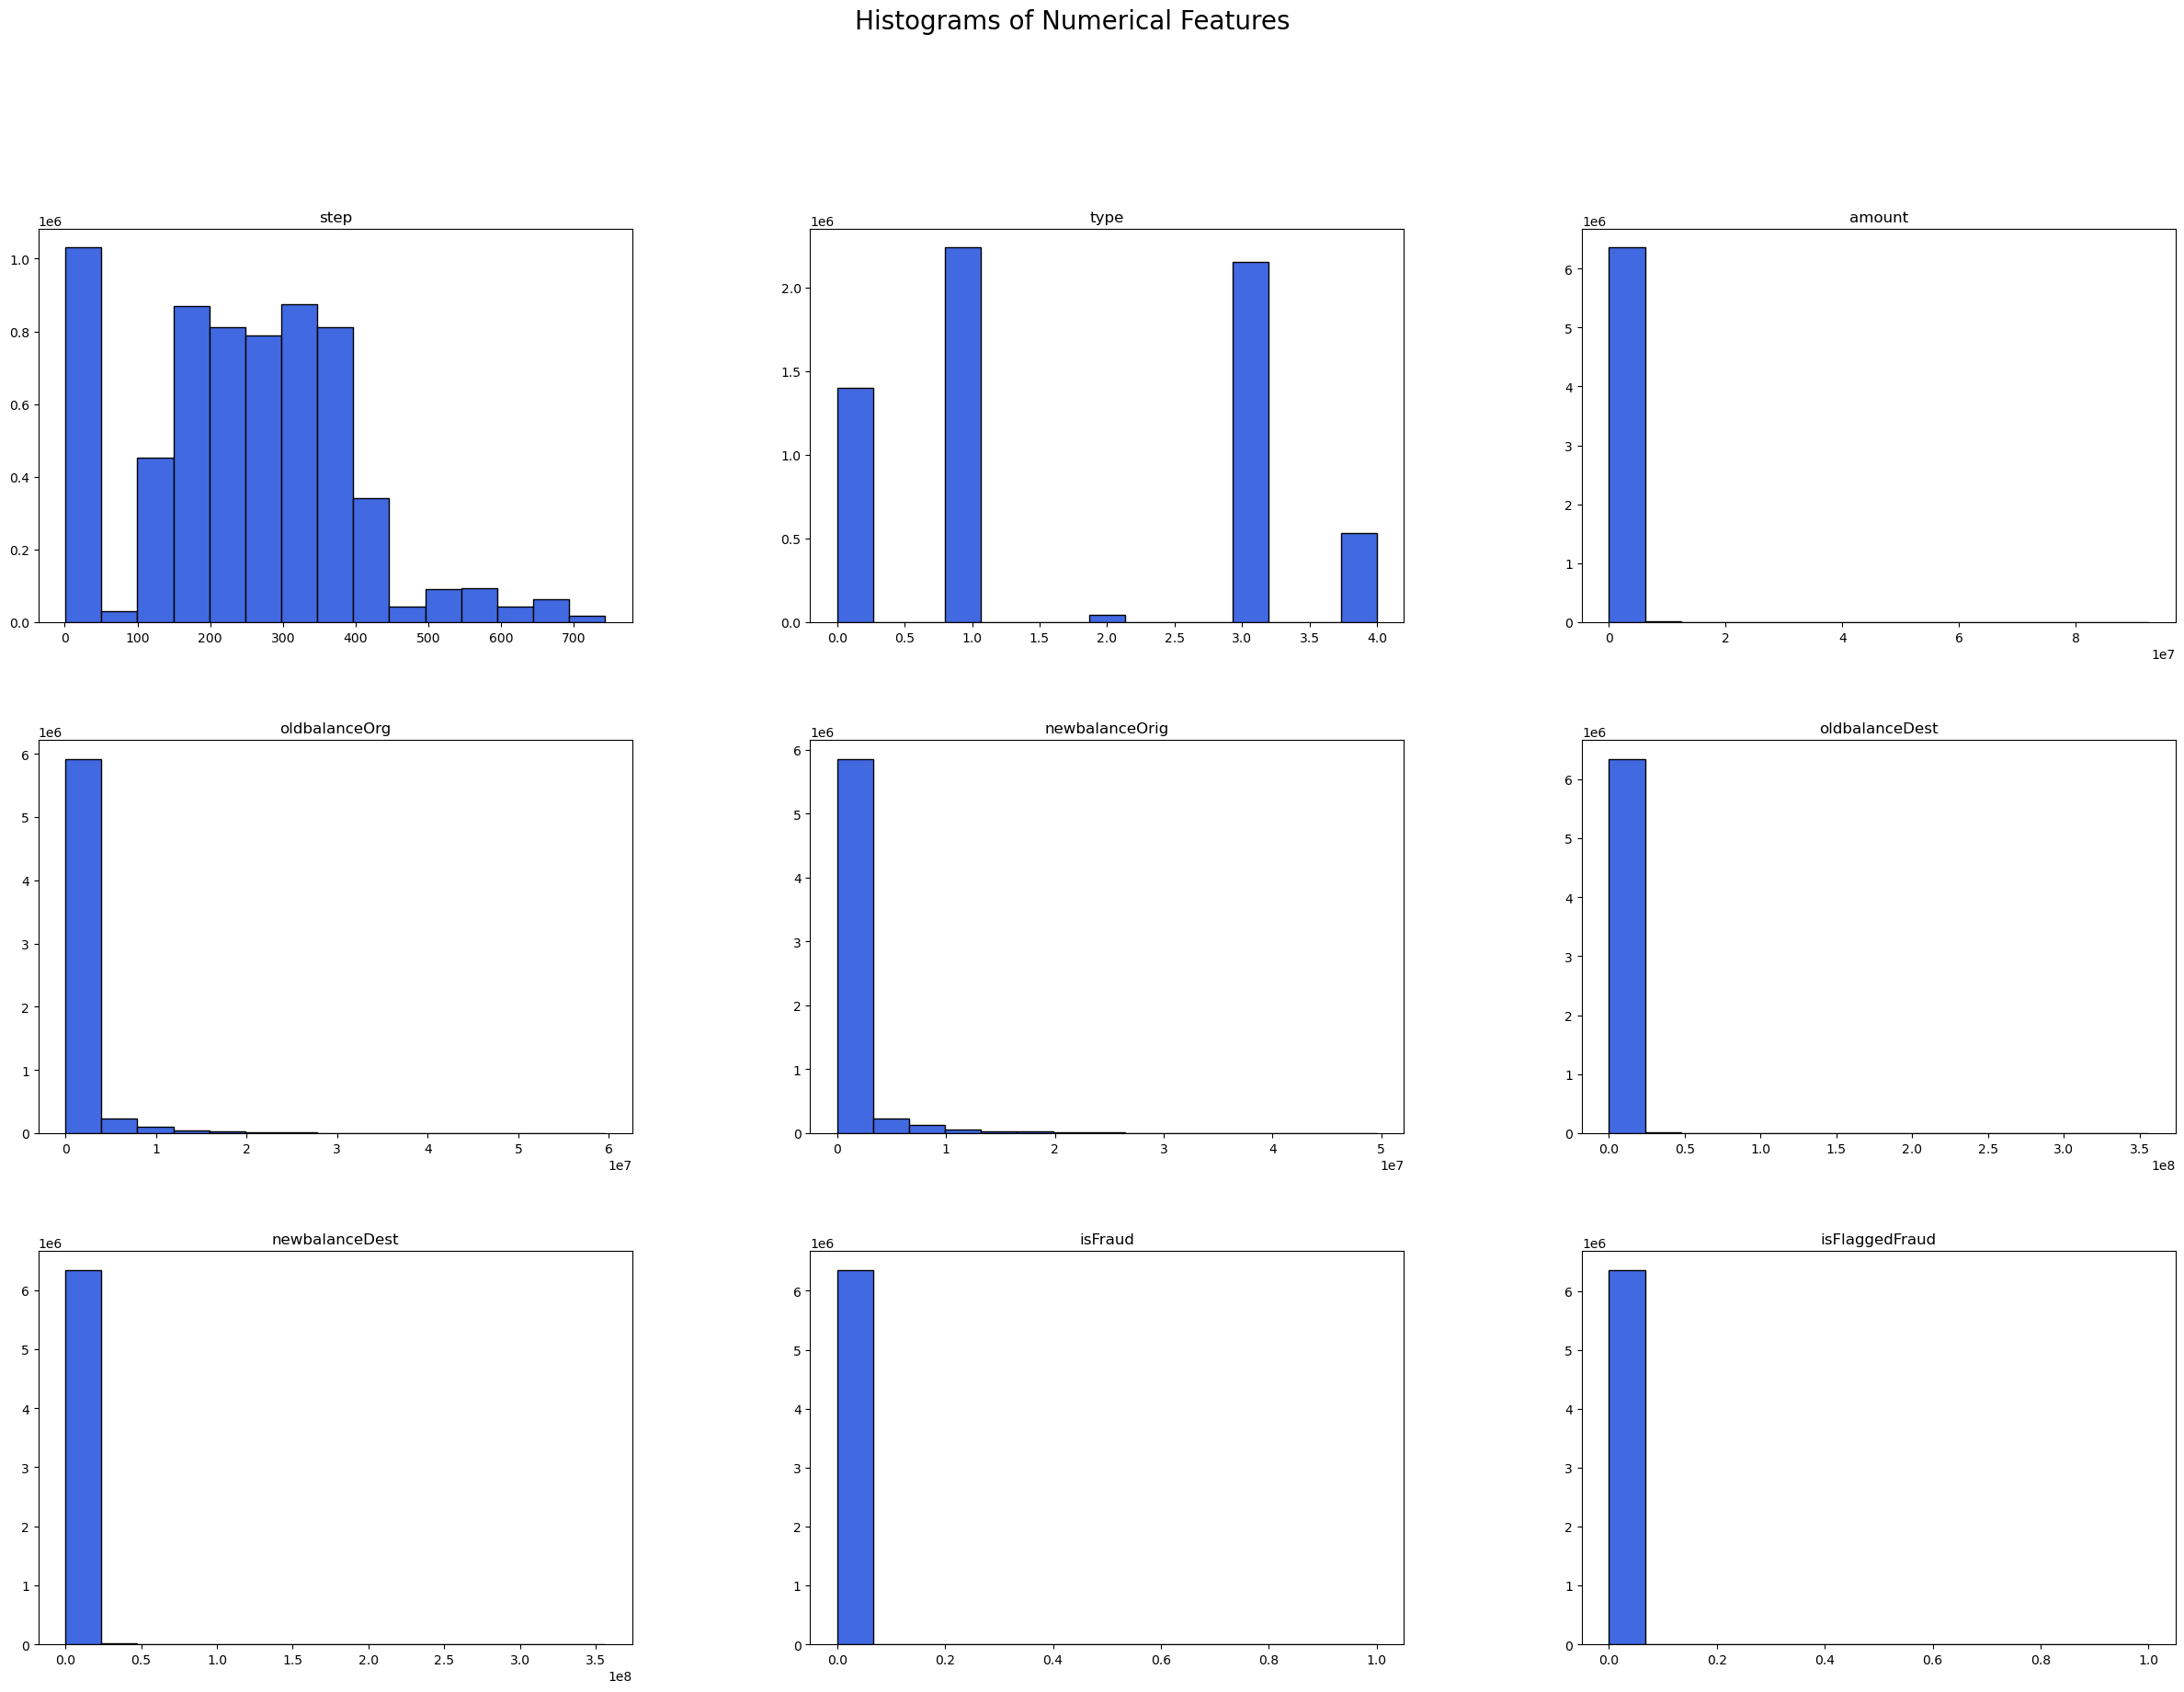

In [14]:
# Visualizing dataset to gain insights (Histograms) to decide which columns needs normal distribution

data.hist(figsize=(30, 20), bins = 15, edgecolor = 'black', grid = False, color = 'royalblue')
plt.suptitle('Histograms of Numerical Features', x = 0.5, y = 1, size = 20)

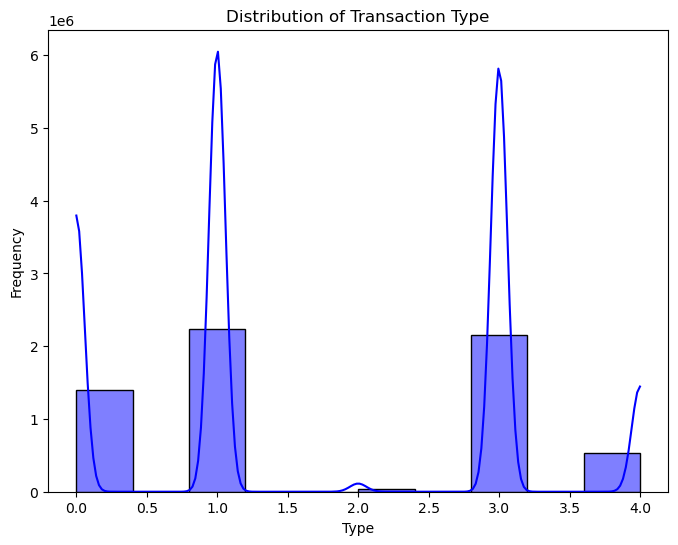

In [15]:
# Plotting the distribution of 'type'
plt.figure(figsize=(8, 6))

# Histogram showing the distribution of transaction type.
sns.histplot(data['type'], bins=10, kde=True, color='blue')
plt.title('Distribution of Transaction Type')
plt.xlabel('Type')  # X-axis label
plt.ylabel('Frequency') # Y-axis label
plt.show()

Value Counts:
 isFraud
0    6354407
1       8197
Name: count, dtype: int64


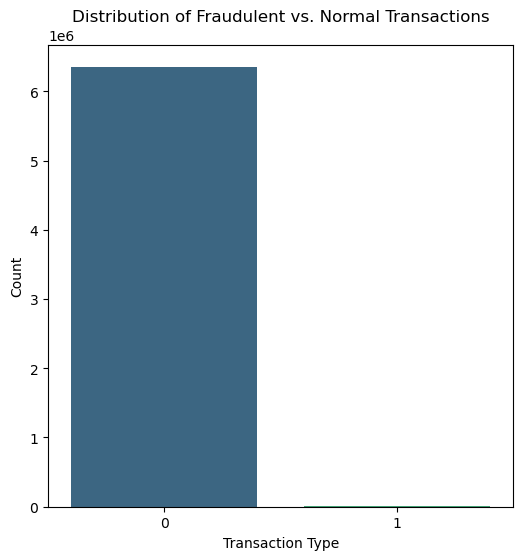

In [16]:
# Getting the value counts for the 'isFraud' variable
value_counts = data['isFraud'].value_counts()
print("Value Counts:\n", value_counts)

# Plotting a count plot to visualize the distribution of fraudulent vs. normal transactions
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='isFraud', order=value_counts.index, palette='viridis')
plt.title('Distribution of Fraudulent vs. Normal Transactions')  # 1 = Fraud, 0 = Normal
plt.xlabel('Transaction Type')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.show()

Value Counts:
 type_catagory
CASH_OUT    2237484
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


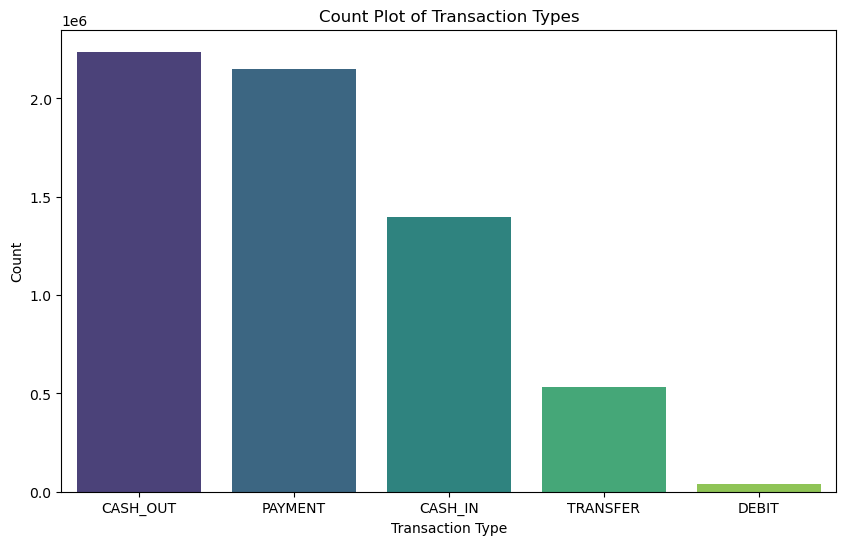

In [17]:
# Getting the value counts for the 'type' column to see the breakdown
value_counts = data['type_catagory'].value_counts()
print("Value Counts:\n", value_counts)

# Plotting a count plot to visualize transaction type popularity
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='type_catagory', order=value_counts.index, palette='viridis')
plt.title('Count Plot of Transaction Types')
plt.xlabel('Transaction Type')  # X-axis label
plt.ylabel('Count') # Y-axis label
plt.show()

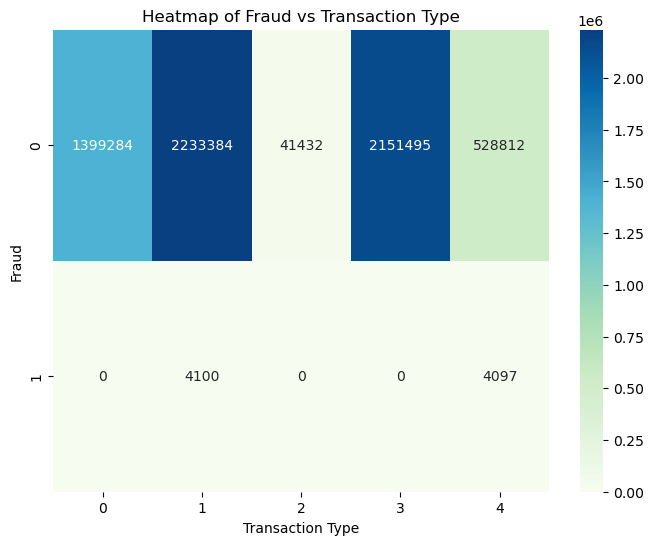

In [18]:
# Creating a pivot table where rows represent fraud, columns represent transaction type.
fraud_vs_type_matrix = pd.crosstab(data['isFraud'], data['type'])
plt.figure(figsize=(8, 6))

# A heatmap illustrating fraud against transaction type.
sns.heatmap(fraud_vs_type_matrix, annot=True, fmt="d", cmap='GnBu', cbar="False")
plt.title('Heatmap of Fraud vs Transaction Type')
plt.xlabel('Transaction Type')  # X-axis label
plt.ylabel('Fraud') # Y-axis label
plt.show()

In [19]:
# Listing of selected features to analyze
selected_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

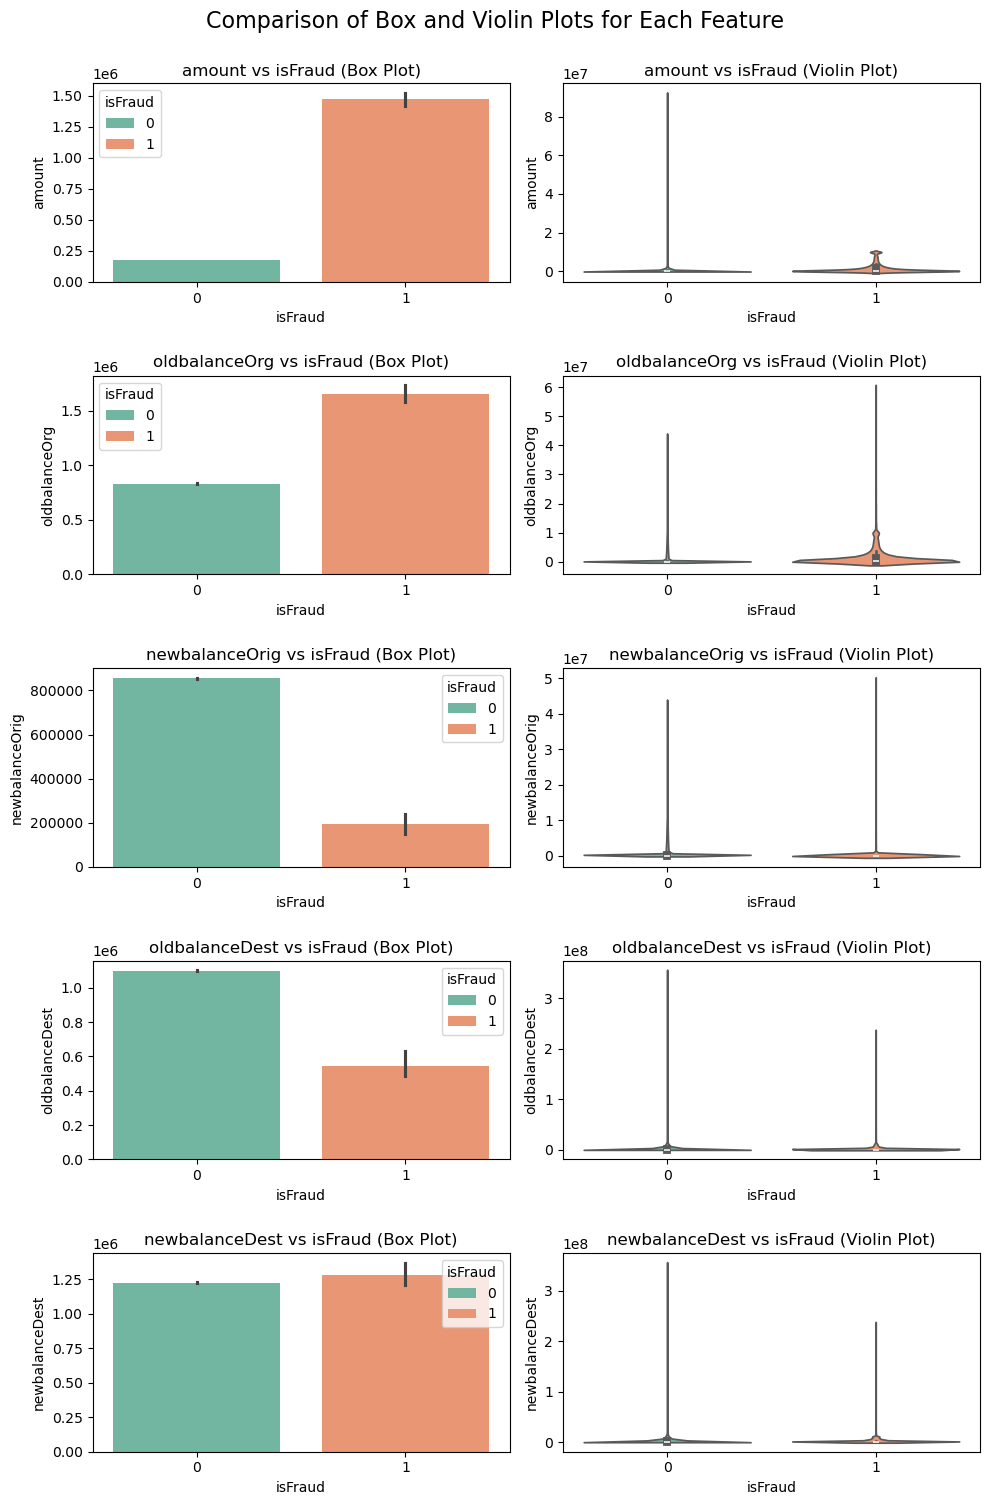

In [46]:
# Setting up the subplot grid
fig, axes = plt.subplots(len(selected_features), 2, figsize=(10, 15)) # rows = features, columns = 2 (box + violin)

# Looping through each feature and creating side-by-side plots
for i, feature in enumerate(selected_features):
    # Box plot (left)
    sns.barplot(x=data['isFraud'], y=data[feature], hue=data['isFraud'], ax=axes[i, 0], palette="Set2")
    axes[i, 0].set_title(f'{feature} vs isFraud (Box Plot)')
    axes[i, 0].set_xlabel('isFraud')
    axes[i, 0].set_ylabel(feature)

    # Violin plot (right)
    sns.violinplot(x=data['isFraud'], y=data[feature], ax=axes[i, 1], palette="Set2", inner='box')
    axes[i, 1].set_title(f'{feature} vs isFraud (Violin Plot)')
    axes[i, 1].set_xlabel('isFraud')
    axes[i, 1].set_ylabel(feature)

# Adding a main title and adjusting layout
plt.suptitle("Comparison of Box and Violin Plots for Each Feature", fontsize=16, y=1.0)
plt.tight_layout()
plt.show()

### Feature Engineering

In [49]:
# Defining weights for transaction types (using actual string labels)
transaction_type_weights = {
    'CASH_OUT': 2.0,
    'PAYMENT': 1.0,
    'CASH_IN': 1.0,
    'TRANSFER': 2.0,
    'DEBIT': 1.0
}

# Assigning weights to each row based on transaction type
data['transaction_type_weight'] = data['type'].map(lambda x: transaction_type_weights.get(x, 1.0))


In [51]:
from sklearn.preprocessing import MinMaxScaler

# Reshape to 2D array as required by scaler
scaler = MinMaxScaler()
data['transaction_type_weight_scaled'] = scaler.fit_transform(data[['transaction_type_weight']])


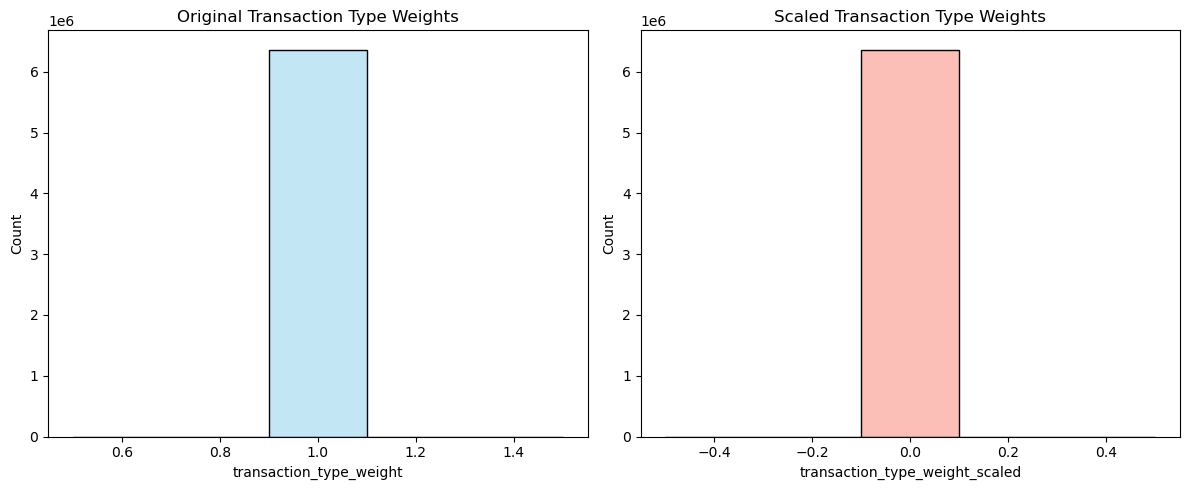

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original weights
sns.histplot(data['transaction_type_weight'], bins=5, ax=axes[0], kde=True, color='skyblue')
axes[0].set_title("Original Transaction Type Weights")

# Scaled weights
sns.histplot(data['transaction_type_weight_scaled'], bins=5, ax=axes[1], kde=True, color='salmon')
axes[1].set_title("Scaled Transaction Type Weights")

plt.tight_layout()
plt.show()


In [57]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

In [97]:
# Initializing MinMaxScaler
minmax_scaler = MinMaxScaler()

# Applying transformation to amount column
data['amount_scaled_minmax'] = minmax_scaler.fit_transform(data[['amount']])

# Initializing StandardScaler
standard_scaler = StandardScaler()

# Applying transformation to amount column
data['amount_scaled_standard'] = standard_scaler.fit_transform(data[['amount']])

# Initializing RobustScaler
robust_scaler = RobustScaler()
 
# Apply transformation to amount column
data['amount_scaled_robust'] = robust_scaler.fit_transform(data[['amount']])

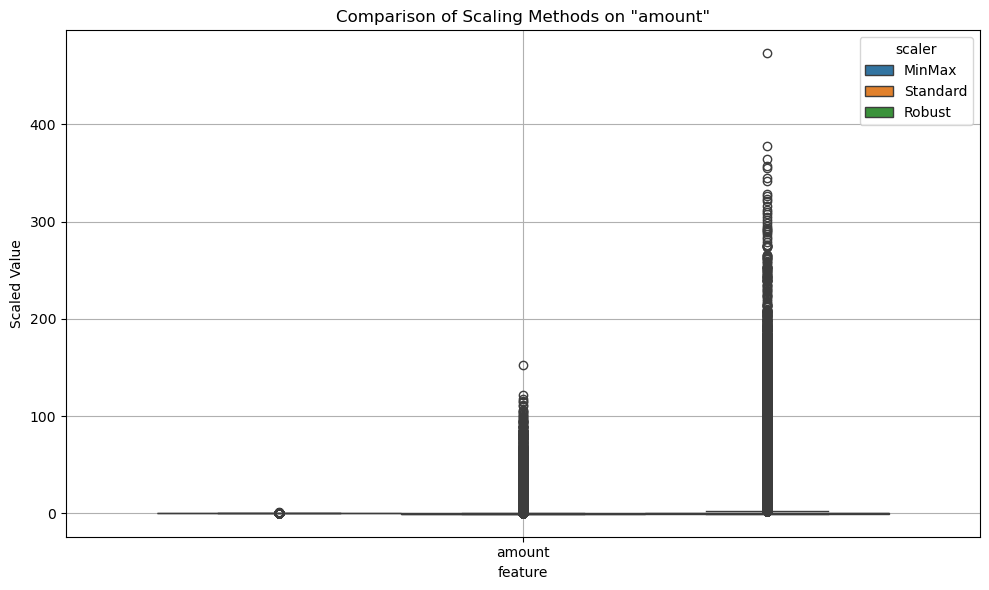

In [99]:
# Creating a DataFrame with the scaled values
scaled_df = pd.DataFrame({
    'amount_minmax': data['amount_scaled_minmax'],
    'amount_standard': data['amount_scaled_standard'],
    'amount_robust': data['amount_scaled_robust'],
    'scaler': ['MinMax'] * len(data) + ['Standard'] * len(data) + ['Robust'] * len(data),
    'value': pd.concat([
        data['amount_scaled_minmax'],
        data['amount_scaled_standard'],
        data['amount_scaled_robust']
    ], ignore_index=True)
})

# Melting for easier seaborn plotting
scaled_df['feature'] = 'amount' 

# Plotting a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='feature', y='value', hue='scaler', data=scaled_df)
plt.title('Comparison of Scaling Methods on "amount"')
plt.ylabel('Scaled Value')
plt.grid(True)
plt.tight_layout()
plt.show()

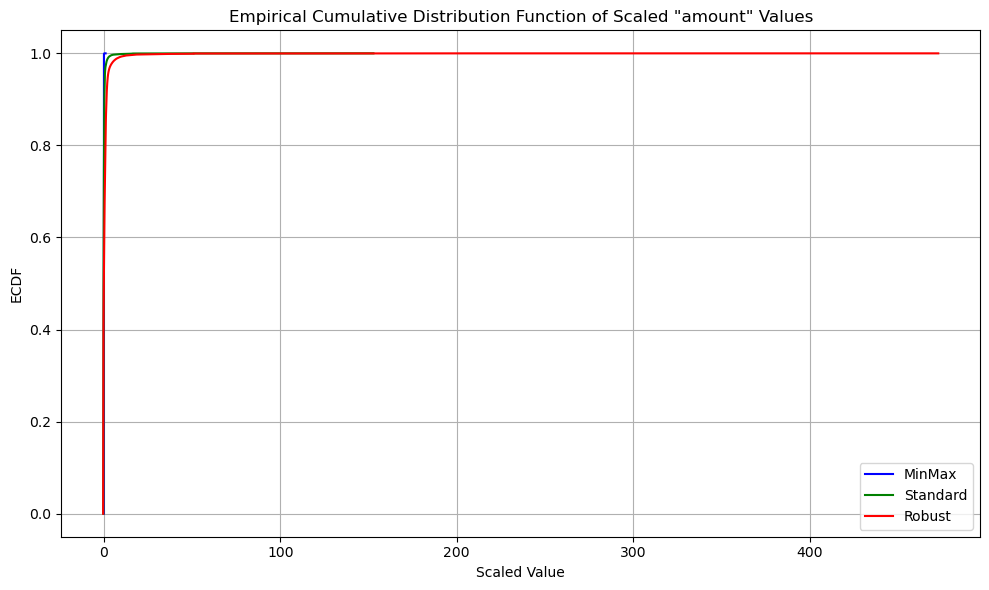

In [100]:
from statsmodels.distributions.empirical_distribution import ECDF

# Compute ECDFs
ecdf_minmax = ECDF(data['amount_scaled_minmax'])
ecdf_standard = ECDF(data['amount_scaled_standard'])
ecdf_robust = ECDF(data['amount_scaled_robust'])

plt.figure(figsize=(10, 6))
plt.plot(ecdf_minmax.x, ecdf_minmax.y, label='MinMax', color='blue')
plt.plot(ecdf_standard.x, ecdf_standard.y, label='Standard', color='green')
plt.plot(ecdf_robust.x, ecdf_robust.y, label='Robust', color='red')
plt.title('Empirical Cumulative Distribution Function of Scaled "amount" Values')
plt.xlabel('Scaled Value')
plt.ylabel('ECDF')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [101]:
# Applying log transformation to prevent zero dominance
data['oldbalanceOrg_log'] = np.log1p(data['oldbalanceOrg'])
data['newbalanceOrig_log'] = np.log1p(data['newbalanceOrig'])
data['oldbalanceDest_log'] = np.log1p(data['oldbalanceDest'])
data['newbalanceDest_log'] = np.log1p(data['newbalanceDest'])

In [115]:
# Prepare the columns and labels
scaled_features = {
    'amount_scaled_minmax': 'Amount (MinMax)',
    'amount_scaled_standard': 'Amount (Standard)',
    'amount_scaled_robust': 'Amount (Robust)',
    'oldbalanceOrg_log': 'Old Balance Orig (Log)',
    'newbalanceOrig_log': 'New Balance Orig (Log)',
    'oldbalanceDest_log': 'Old Balance Dest (Log)',
    'newbalanceDest_log': 'New Balance Dest (Log)'
}

# Collect descriptive stats
stats_data = []

for col, label in scaled_features.items():
    stats = data[col].describe()
    stats_data.append({
        'Feature': label,
        'Mean': stats['mean'],
        'Std': stats['std'],
        'Min': stats['min'],
        'Max': stats['max']
    })

# Create DataFrame
stats_df = pd.DataFrame(stats_data)
stats_df.set_index('Feature', inplace=True)

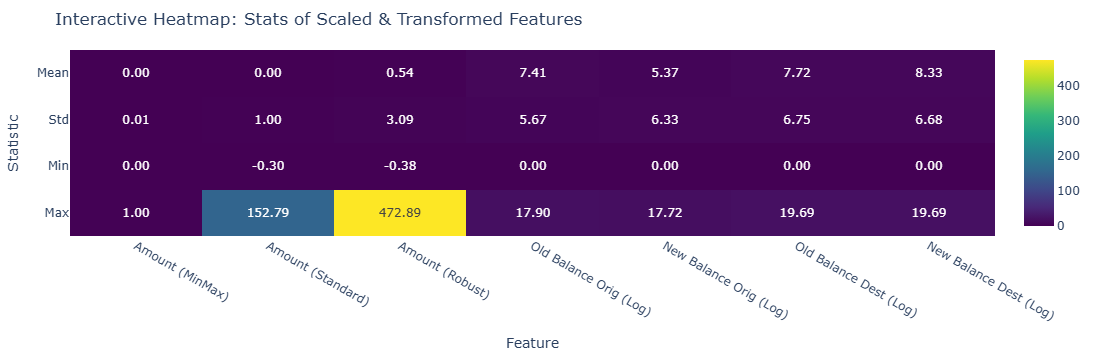

In [119]:
import plotly.express as px

# Reset index for Plotly
stats_df_reset = stats_df.reset_index().melt(id_vars='Feature', var_name='Statistic', value_name='Value')

# Plot interactive heatmap
fig = px.imshow(
    stats_df.T,
    text_auto='.2f',
    aspect='auto',
    color_continuous_scale='Viridis',
    title="Interactive Heatmap: Stats of Scaled & Transformed Features"
)
fig.update_layout(
    xaxis_title="Feature",
    yaxis_title="Statistic",
    autosize=True,
    margin=dict(l=60, r=60, t=50, b=60),
)
fig.show()

In [139]:
# Group and aggregate
fraud_stats = data.groupby('amount_bin').agg(
    Total_Transactions=('isFraud', 'count'),
    Fraudulent_Transactions=('isFraud', 'sum'),
    Total_Amount=('amount', 'sum'),
    Fraud_Amount=('amount', lambda x: x[data.loc[x.index, 'isFraud'] == 1].sum()),
).reset_index()

# Calculate rates and proportions
fraud_stats['Fraud_Rate (%)'] = (fraud_stats['Fraudulent_Transactions'] / fraud_stats['Total_Transactions']) * 100
fraud_stats['Fraud_Amount_Proportion (%)'] = (fraud_stats['Fraud_Amount'] / fraud_stats['Total_Amount']) * 100

# Custom "Fraud Risk Index" — you can tweak the weights
fraud_stats['Fraud_Risk_Index'] = (
    0.5 * fraud_stats['Fraud_Rate (%)'] + 0.5 * fraud_stats['Fraud_Amount_Proportion (%)']
)

# Sort by risk index
fraud_stats = fraud_stats.sort_values(by='Fraud_Risk_Index', ascending=False)

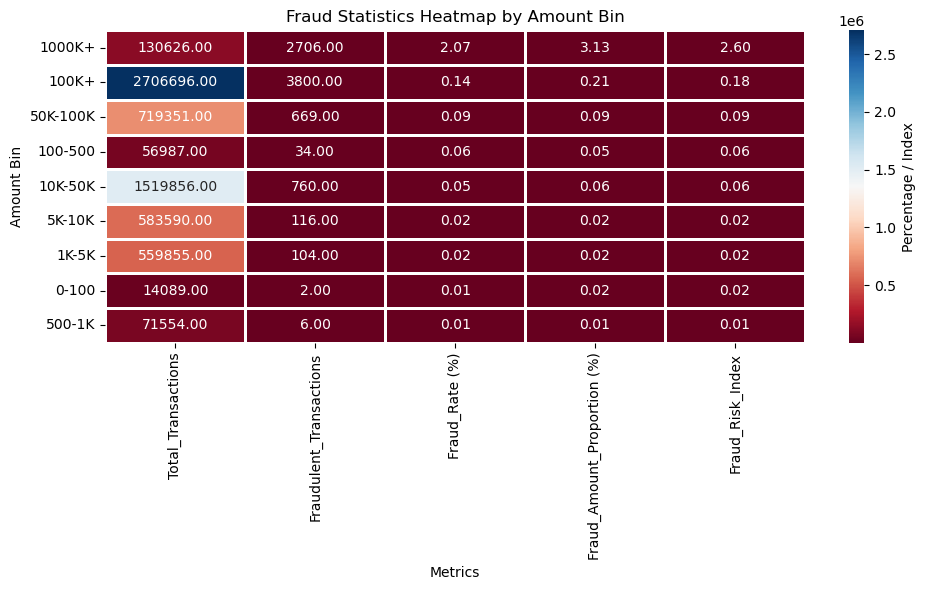

In [137]:
# Select relevant columns for the heatmap
fraud_stats_heatmap = fraud_stats[['Total_Transactions', 'Fraudulent_Transactions', 'Fraud_Rate (%)', 'Fraud_Amount_Proportion (%)', 'Fraud_Risk_Index']]

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(fraud_stats_heatmap.set_index(fraud_stats['amount_bin']),
            annot=True,           # Annotate with actual values
            cmap='RdBu',        # Color map, you can change this for different colors
            fmt='.2f',            # Formatting the numbers to 2 decimal places
            linewidths=1,         # Line thickness between cells
            cbar_kws={'label': 'Percentage / Index'},  # Label for the color bar
            xticklabels=True,     # Show x-axis labels
            yticklabels=True)     # Show y-axis labels

# Title and labels
plt.title('Fraud Statistics Heatmap by Amount Bin')
plt.xlabel('Metrics')
plt.ylabel('Amount Bin')

# Show the plot
plt.tight_layout()
plt.show()


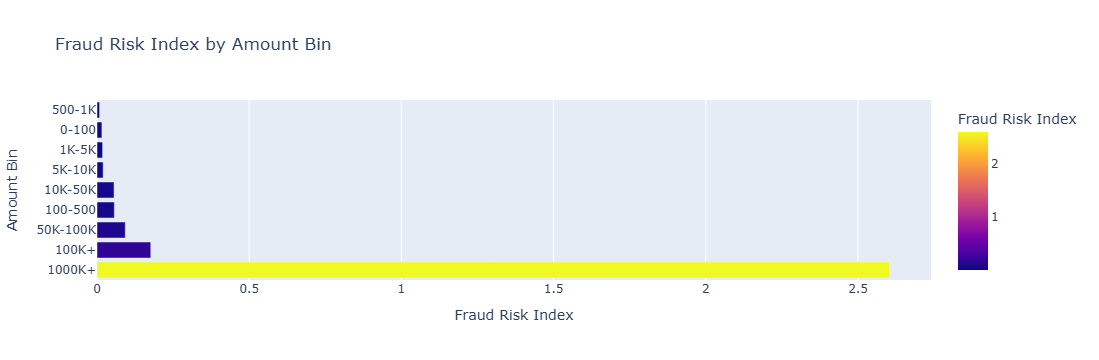

In [131]:
# Create an interactive plot
fig = px.bar(fraud_stats, x='Fraud_Risk_Index', y='amount_bin',
             title='Fraud Risk Index by Amount Bin',
             labels={'Fraud_Risk_Index': 'Fraud Risk Index', 'amount_bin': 'Amount Bin'},
             color='Fraud_Risk_Index', orientation='h')

# Show the plot
fig.show()

In [141]:
# Define weights for each transaction amount bin
bin_weights = {
    '0-100': 1.0,
    '100-500': 1.0,
    '500-1K': 1.0,
    '1K-5K': 1.0,
    '5K-10K': 1.0,
    '10K-50K': 1.0,
    '50K-100K': 1.0,
    '100K+': 1.5,
    '1000K+': 2.0
}

# Assign bin weights to the data DataFrame
data['bin_weight'] = data['amount_bin'].map(lambda x: bin_weights.get(x, 1.0))

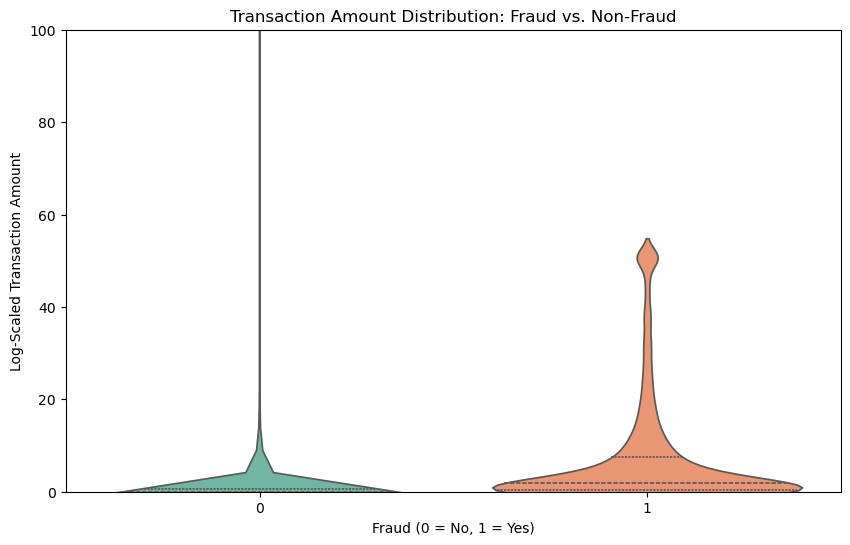

In [144]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='isFraud', y='amount_scaled_robust', data=data, palette='Set2', inner='quartile')

plt.title("Transaction Amount Distribution: Fraud vs. Non-Fraud")
plt.xlabel("Fraud (0 = No, 1 = Yes)")
plt.ylabel("Log-Scaled Transaction Amount")
plt.ylim(0, 100)
plt.show()

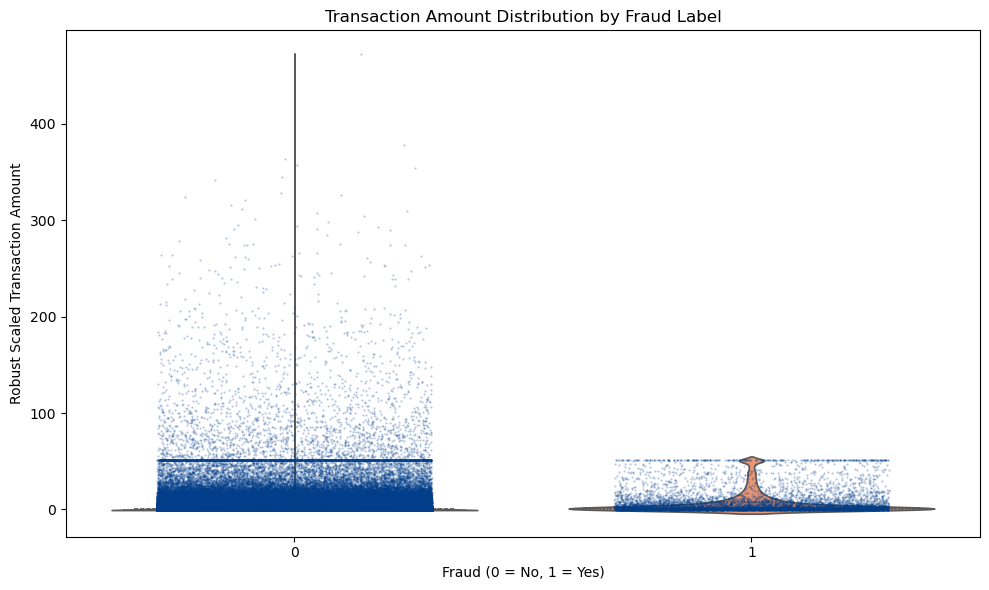

In [151]:
plt.figure(figsize=(10, 6))

# Violin plot for distribution
sns.violinplot(
    x='isFraud', y='amount_scaled_robust', data=data,
    palette='Set2', inner='quartile'
)

# Swarm plot overlay for individual points
sns.stripplot(
    x='isFraud', y='amount_scaled_robust', data=data,
    color='#023E8A', size=1.5, jitter=0.3, alpha=0.3
)

plt.title("Transaction Amount Distribution by Fraud Label")
plt.xlabel("Fraud (0 = No, 1 = Yes)")
plt.ylabel("Robust Scaled Transaction Amount")
plt.tight_layout()
plt.show()


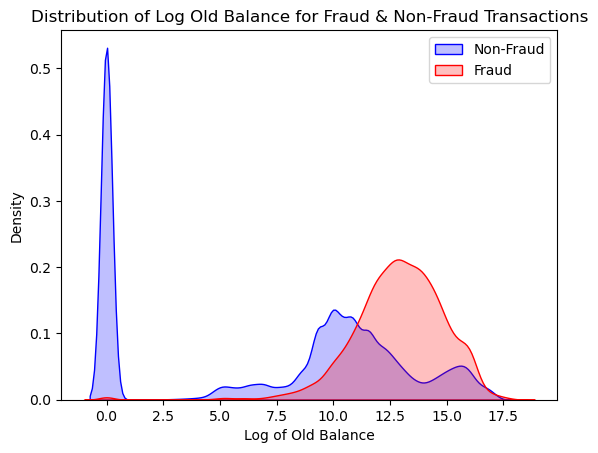

In [153]:
# KDE plot for non-fraudulent transactions
sns.kdeplot(data=data[data['isFraud'] == 0], 
            x='oldbalanceOrg_log', label='Non-Fraud', fill=True, color='blue')

# KDE plot for fraudulent transactions
sns.kdeplot(data=data[data['isFraud'] == 1], 
            x='oldbalanceOrg_log', label='Fraud', fill=True, color='red')

# Add labels and title
plt.xlabel("Log of Old Balance")
plt.ylabel("Density")
plt.title("Distribution of Log Old Balance for Fraud & Non-Fraud Transactions")
plt.legend()
plt.show()


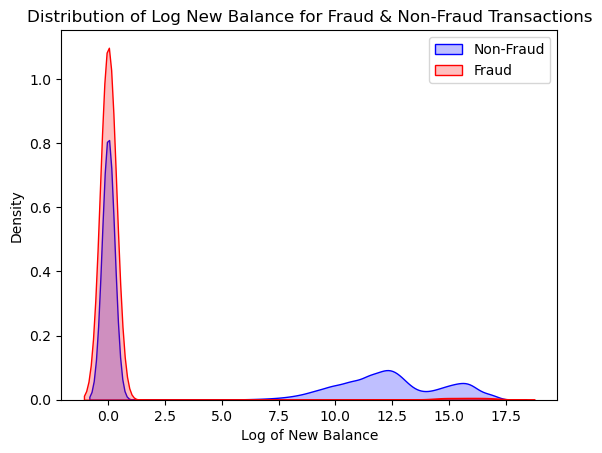

In [154]:
# KDE plot for non-fraudulent transactions
sns.kdeplot(data=data[data['isFraud'] == 0], 
            x='newbalanceOrig_log', label='Non-Fraud', fill=True, color='blue')

# KDE plot for fraudulent transactions
sns.kdeplot(data=data[data['isFraud'] == 1], 
            x='newbalanceOrig_log', label='Fraud', fill=True, color='red')

# Add labels and title
plt.xlabel("Log of New Balance")
plt.ylabel("Density")
plt.title("Distribution of Log New Balance for Fraud & Non-Fraud Transactions")
plt.legend()
plt.show()

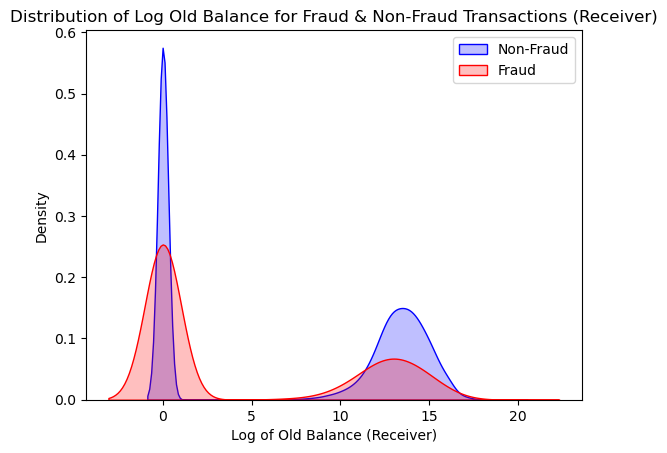

In [155]:
# KDE plot for non-fraudulent transactions
sns.kdeplot(data=data[data['isFraud'] == 0], 
            x='oldbalanceDest_log', label='Non-Fraud', fill=True, color='blue')

# KDE plot for fraudulent transactions
sns.kdeplot(data=data[data['isFraud'] == 1], 
            x='oldbalanceDest_log', label='Fraud', fill=True, color='red')

# Add labels and title
plt.xlabel("Log of Old Balance (Receiver)")
plt.ylabel("Density")
plt.title("Distribution of Log Old Balance for Fraud & Non-Fraud Transactions (Receiver)")
plt.legend()
plt.show()

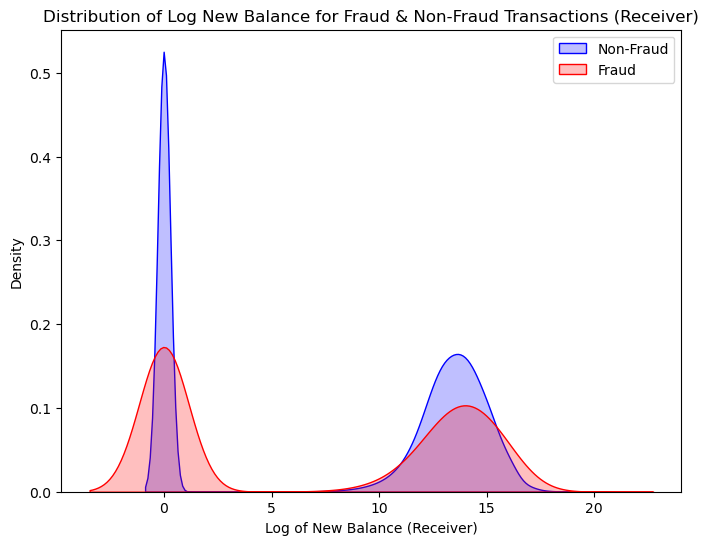

In [156]:
# Set figure size
plt.figure(figsize=(8, 6))

# KDE plot for non-fraudulent transactions
sns.kdeplot(data=data[data['isFraud'] == 0], 
            x='newbalanceDest_log', label='Non-Fraud', fill=True, color='blue')

# KDE plot for fraudulent transactions
sns.kdeplot(data=data[data['isFraud'] == 1], 
            x='newbalanceDest_log', label='Fraud', fill=True, color='red')

# Add labels and title
plt.xlabel("Log of New Balance (Receiver)")
plt.ylabel("Density")
plt.title("Distribution of Log New Balance for Fraud & Non-Fraud Transactions (Receiver)")
plt.legend()
plt.show()